In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Heirarical\nepal_earthquakes_1990_2026.csv")   # 👈 inga un dataset path podu

print(df.head())
print(df.info())

                       time  latitude  longitude   depth  mag magType   nst  \
0  2025-12-07T02:43:07.342Z   29.8698    80.9384  43.404  4.4      mb  21.0   
1  2025-12-04T11:59:01.015Z   29.1109    87.0043  10.000  4.1      mb  36.0   
2  2025-11-10T22:44:15.027Z   29.1757    86.8367  10.000  4.2      mb  14.0   
3  2025-11-03T20:57:22.312Z   28.5267    87.3673  10.000  4.7      mb  64.0   
4  2025-10-21T14:59:40.611Z   29.0245    85.3683  10.000  4.1      mb  25.0   

     gap   dmin   rms  ...                   updated  \
0  166.0  8.856  0.94  ...  2025-12-26T01:20:25.040Z   
1  168.0  3.646  1.26  ...  2025-12-27T14:38:45.040Z   
2  164.0  3.779  0.57  ...  2025-12-01T01:43:29.040Z   
3   79.0  3.493  0.77  ...  2025-11-23T19:51:34.188Z   
4  163.0  5.072  0.44  ...  2025-11-13T19:11:33.040Z   

                        place        type horizontalError depthError  \
0  37 km E of Dārchulā, Nepal  earthquake           13.18      9.350   
1  130 km N of Lobuche, Nepal  earthquake   

In [4]:
X = df.select_dtypes(include=[np.number])

print("Selected Features:")
print(X.columns)

Selected Features:
Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
       'horizontalError', 'depthError', 'magError', 'magNst'],
      dtype='object')


In [5]:
X = X.fillna(X.mean())

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

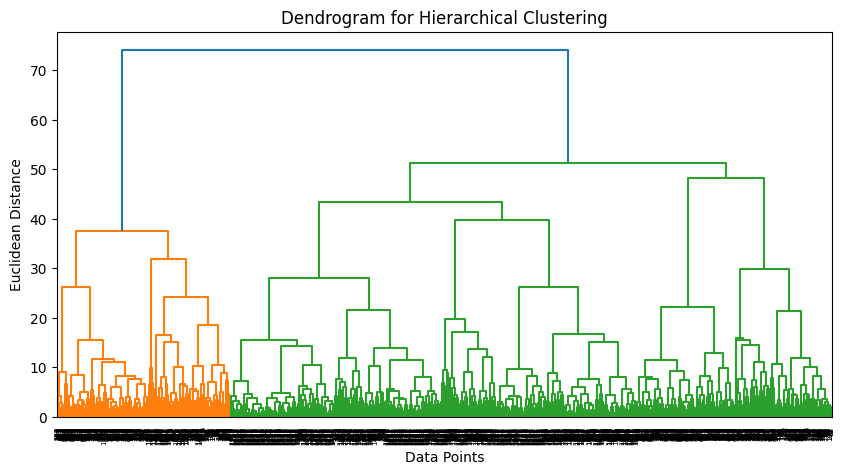

In [7]:
plt.figure(figsize=(10, 5))
linked = linkage(X_scaled, method='ward')

dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [8]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

clusters = hc.fit_predict(X_scaled)

In [9]:
hc = AgglomerativeClustering(
    n_clusters=3,      # 👈 dendrogram pathu change pannalam
    linkage='ward'
)

clusters = hc.fit_predict(X_scaled)

In [10]:
df['Cluster'] = clusters
print(df.head())

                       time  latitude  longitude   depth  mag magType   nst  \
0  2025-12-07T02:43:07.342Z   29.8698    80.9384  43.404  4.4      mb  21.0   
1  2025-12-04T11:59:01.015Z   29.1109    87.0043  10.000  4.1      mb  36.0   
2  2025-11-10T22:44:15.027Z   29.1757    86.8367  10.000  4.2      mb  14.0   
3  2025-11-03T20:57:22.312Z   28.5267    87.3673  10.000  4.7      mb  64.0   
4  2025-10-21T14:59:40.611Z   29.0245    85.3683  10.000  4.1      mb  25.0   

     gap   dmin   rms  ...                       place        type  \
0  166.0  8.856  0.94  ...  37 km E of Dārchulā, Nepal  earthquake   
1  168.0  3.646  1.26  ...  130 km N of Lobuche, Nepal  earthquake   
2  164.0  3.779  0.57  ...  136 km N of Lobuche, Nepal  earthquake   
3   79.0  3.493  0.77  ...  84 km NE of Lobuche, Nepal  earthquake   
4  163.0  5.072  0.44  ...    35 km SSE of Saga, China  earthquake   

  horizontalError depthError magError  magNst    status  locationSource  \
0           13.18      9.350 

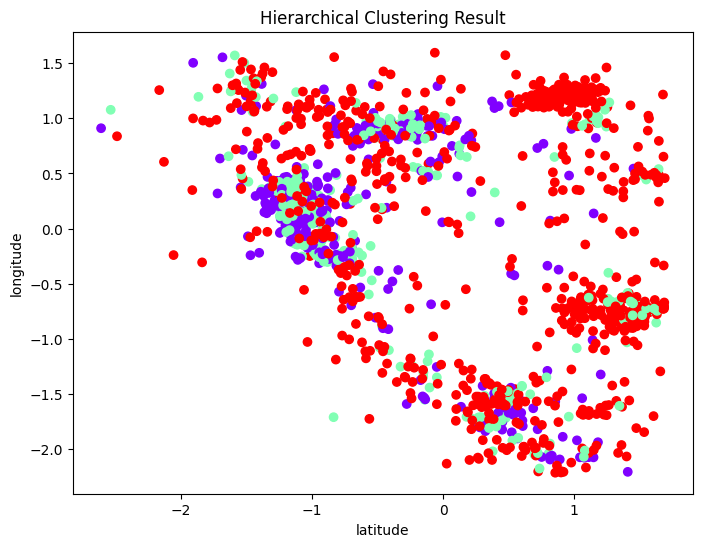

In [11]:
plt.figure(figsize=(8, 6))

plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=clusters,
    cmap='rainbow'
)

plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Hierarchical Clustering Result")
plt.show()
